In [68]:
import numpy as np
from itertools import product
from typing import Tuple, Union
import matplotlib.pyplot as plt

In [69]:
# Generating bits to be transmitted
number_bits = 8
M = 4
modulation = "pam" # pam or qam
data = np.random.randint(0,2, number_bits)
print(data)

[0 0 1 0 1 0 0 0]


In [70]:
def mod_demod(data: Union[np.ndarray, list],M: int, delta:int=2, mod_name:str="pam", type:str="mod") -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
	if np.log2(M) % 2 != 0:
		raise Exception("Only acept log2(M) multiple of 2")
	number_bits_per_symbol = int(np.log2(M))
	binary_combinations = list(product([0,1], repeat=number_bits_per_symbol))
	canonical_constellation = np.arange(-(M-1), M-1+delta, delta)
	normalized_constellation = canonical_constellation/np.sqrt(np.mean(np.power(canonical_constellation, 2)))
	if type=="mod":
		data_reshaped = np.reshape(data, (int(len(data)//number_bits_per_symbol), number_bits_per_symbol))
		dict_result = {str(binary_combination): symbol for binary_combination, symbol in zip(binary_combinations, normalized_constellation)}
		result = np.array([dict_result[str(tuple(bits_symbol))] for bits_symbol in data_reshaped])
	elif type=="demod":
		dict_result = {str(symbol): binary_combination for binary_combination, symbol in zip(binary_combinations, normalized_constellation)}
		result = np.array([dict_result[str(symbol)] for symbol in data]).flatten()
	else:
		raise Exception("Function only accept 'mod' or 'demod' value for parameter type")

	return (result, canonical_constellation, normalized_constellation, dict_result)

symbols, canonical_constellation, normalized_constellation, dict_symbols = mod_demod(data, M)

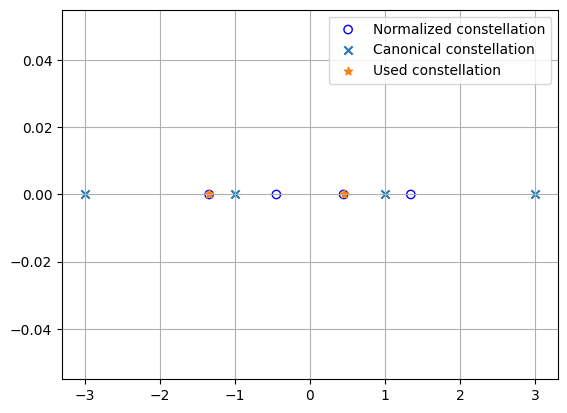

In [71]:
plt.figure()
plt.scatter(normalized_constellation, np.zeros(len(symbols)), marker='o', label="Normalized constellation", facecolors='none', edgecolors="b")
plt.scatter(canonical_constellation, np.zeros(len(symbols)), marker='x', label="Canonical constellation")
plt.scatter(symbols, np.zeros(len(symbols)), marker='*', label="Used constellation")
plt.legend()
plt.grid()
plt.show()

In [93]:
bits, canonical_constellation, normalized_constellation, dict_symbols = mod_demod(symbols, M, type="demod")

def ber_calculation(input: np.ndarray, output: np.ndarray):
	return np.sum(np.logical_not(np.equal(input,output)).astype(int))/len(input)

print(ber_calculation(data, bits))

0.0
